In [34]:
from interaction_inference import dataset, optimization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

# Prior for interaction: miRNA targets

miRNA are small non-coding RNA that play an important role in regulating expression by 'splitting' / degrading mRNA transcripts.

TargetScan is a database that predicts the mRNA targeted by a given miRNA (albeit with many false positives).

This can be used both as a prior to select candidates for interaction testing, or as validation data to assess results of interaction tests. 

## Select miRNA

From the Smart-seq-total dataset of transcript counts, select miRNA transcripts

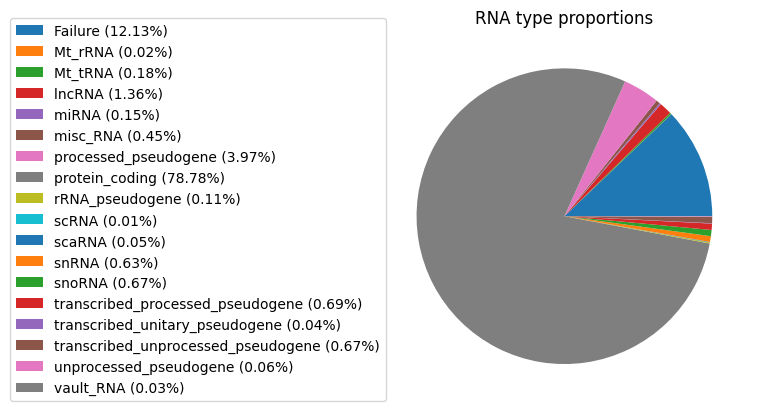

9376 protein coding RNA 
18 miRNA


,Fibroblasts_A10_S10,Fibroblasts_A11_S11,Fibroblasts_A2_S2,Fibroblasts_A3_S3,Fibroblasts_A4_S4,Fibroblasts_A5_S5,Fibroblasts_A7_S7,Fibroblasts_A8_S8,Fibroblasts_B10_S34,Fibroblasts_B11_S35,...,Fibroblasts_P18_S378,Fibroblasts_P1_S361,Fibroblasts_P21_S381,Fibroblasts_P22_S382,Fibroblasts_P23_S383,Fibroblasts_P3_S363,Fibroblasts_P4_S364,Fibroblasts_P5_S365,Fibroblasts_P6_S366,Fibroblasts_P8_S368
MIR100,0,5,0,0,1,0,0,0,0,2,...,3,0,4,2,105,0,0,0,0,0
MIR103A2,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,62
MIR16-2,0,0,0,0,0,0,0,0,0,0,...,66,0,10,3,39,0,29,0,0,0
MIR199A1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
MIR199A2,1,0,1,0,0,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
MIR221,19,0,0,0,13,0,0,0,0,0,...,0,0,0,0,51,0,2,0,0,0
MIR222,37,16,1,7,18,3,1,25,15,19,...,44,5,39,8,43,1,3,2,6,2
MIR23A,0,7,0,0,2,0,0,4,0,1,...,10,0,6,0,437,0,1,0,3,1
MIR24-2,0,2,0,0,0,0,0,0,2,0,...,3,0,12,12,28,0,0,1,1,0
MIR27A,0,5,0,0,6,2,6,10,3,1,...,0,0,1,0,0,0,0,0,1,0


In [5]:
# read fibroblast transcript counts (for genes with mean expression > 1)
data_FIB = pd.read_csv("../Datasets/GSE151334_FIB_counts_thresh.csv", index_col=0)

# read RNA types in from file
biotypes_dict = json.load(open("../Datasets/GSE151334_RNA_types_thresh.json"))
biotypes_dict = {int(i): btype for i, btype in biotypes_dict.items()}
biotypes = [btype for btype in biotypes_dict.values()]

# display proportions of RNA types
counts = np.unique(biotypes, return_counts=True)
plt.pie(counts[1])
plt.legend(loc=(-1, 0), labels=[f"{name} ({round(100 * count / data_FIB.shape[0], 2)}%)" for name, count in zip(counts[0], counts[1])])
plt.title("RNA type proportions")
plt.show()

# select indices of types
pcRNA_indices = [idx for idx, val in enumerate(biotypes) if val == "protein_coding"]
miRNA_indices = [idx for idx, val in enumerate(biotypes) if val == "miRNA"]

# select rows by index
data_pcRNA = data_FIB.iloc[pcRNA_indices]
data_miRNA = data_FIB.iloc[miRNA_indices]

print(f"{data_pcRNA.shape[0]} protein coding RNA \n{data_miRNA.shape[0]} miRNA")

data_miRNA

## Select miRNA targets

For each miRNA above, use TargetScan to get a list of the predicted mRNA targets 

In [74]:
data_target = pd.read_csv("TargetScan8.0__miR-103a-2-5p.Human.predicted_targets.txt", delimiter="\t")
data_target.head()

,Target gene,Representative transcript,Gene name,3P-seq tags + 5,Total sites,8mer sites,7mer-m8 sites,7mer-A1 sites,6mer sites,Representative miRNA,Predicted occupancy (low miRNA),Predicted occupancy (high miRNA),Predicted occupancy (transfected miRNA),Cumulative weighted context++ score,Total context++ score,Aggregate PCT
0,PPP1R12B,ENST00000608999.1,"protein phosphatase 1, regulatory subunit 12B",18,3,1,1,1,5,hsa-miR-103a-2-5p,NaN,NaN,NaN,-1.21,-1.81,NaN
1,CCDC180,ENST00000395220.1,coiled-coil domain containing 180,10,2,1,0,1,5,hsa-miR-103a-2-5p,NaN,NaN,NaN,-1.08,-1.08,NaN
2,ARHGAP17,ENST00000441763.2,Rho GTPase activating protein 17,1337,3,1,1,1,0,hsa-miR-103a-2-5p,NaN,NaN,NaN,-1.02,-1.02,NaN
3,DST,ENST00000312431.6,dystonin,439,7,4,1,2,4,hsa-miR-103a-2-5p,NaN,NaN,NaN,-1.01,-1.05,NaN
4,XRCC5,ENST00000392133.3,X-ray repair complementing defective repair in...,14802,1*,0,0,0,6,hsa-miR-103a-2-5p,NaN,NaN,NaN,-1.00,0.00,NaN


In [75]:
mir_targets = list(data_target['Target gene'])
gene_names = list(data_FIB.index)
available_targets = list(set(mir_targets) & set(gene_names))

print(f"{len(mir_targets)} miRNA targets selected")
print(f"{len(available_targets)} are in the dataset")

4756 miRNA targets selected
2770 are in the dataset


### Analysis

In [46]:
def estimate_capture(df, beta_mean=0.1):

    # set mean beta
    MeanBETA = beta_mean

    #xx<-Matrix::colSums(Data)
    xx = df.sum(axis='rows')

    #Normcount <- t_sp(t_sp(Data)/xx) * mean(xx)
    # Normcount <- Matrix::t(Matrix::t(Data)/xx) * mean(xx)
    Normcount = (df / xx) * np.mean(xx) # sum = mean(xx) per column

    #means <- Matrix::rowMeans(Normcount)
    means = Normcount.mean(axis='columns')

    #lmeans <- log(means)
    lmean = np.log(means)

    #med <- apply(log(Normcount + 1), 1, function(x) {
    #    median(x)
    #})
    med = np.log(Normcount + 1).median(axis=1)

    #mad <- apply(log(Normcount + 1), 1, function(x) {
    #    mad(x)
    #})
    mad = np.log(Normcount + 1).apply(lambda row: (row - row.median()).abs().median(), axis=1)

    #bound <- med + 3 * mad
    bound = med + 3*mad

    #maxlogGene <- apply(log(Normcount + 1), 1, max)
    maxlogGene = np.log(Normcount + 1).max(axis=1)

    #ind <- which(maxlogGene < bound)
    ind = maxlogGene < bound

    #dropout = apply(Data, 1, function(x) {
    #    length(which(x == 0))/length(x)
    #})
    dropout = df.apply(lambda row: (row == 0).sum() / row.size, axis=1)


    #Select_ind <- intersect(ind, which(dropout < 0.35))
    Select_ind = ind & (dropout < 0.35)

    # Selected_genes <- rownames(Data)[Select_ind]
    Selected_genes = list(Select_ind.index)

    #temppp <- Matrix::colSums(Data[Select_ind, ])
    temppp = df[Select_ind].sum(axis=0)

    #BETA <- temppp/mean(temppp) * MeanBETA
    BETA = (temppp / temppp.mean()) * MeanBETA

    #if (length(which(BETA >= 1)) > 0) {
    #    BETA[BETA >= 1] = max(BETA[BETA < 1])
    #}
    #if (length(which(BETA <= 0)) > 0) {
    #    BETA[BETA <= 0] = min(BETA[BETA > 0])
    #}
    if (BETA >= 1).size > 0:
        BETA[BETA >= 1] = BETA[BETA < 1].max()
    if (BETA <= 0).size > 0:
        BETA[BETA <= 0] = BETA[BETA > 0].min()

    #names(BETA) <- colnames(Data)

    #return(list(BETA = BETA, Selected_genes = Selected_genes))
    BETA = BETA.to_numpy()
    
    return BETA

In [47]:
beta = estimate_capture(data_FIB)

In [65]:
def construct_dataset(name, mir, targets, beta, thresh_OB=5, resamples=1000):

    # size
    gene_pairs, cells = targets.shape

    # construct paired count dataframe
    counts_df = pd.DataFrame(
        index = [f"Gene-pair-{i}" for i in range(gene_pairs)],
        columns = [f"Cell-{j}" for j in range(cells)]
    )

    # fill with pairs
    for i in range(gene_pairs):
        gene_i = mir
        gene_j = targets.iloc[0]
        gene_pair_ij = list(zip(gene_i, gene_j))
        counts_df.iloc[i] = gene_pair_ij

    # construct dataset object
    data = dataset.Dataset(name)
    data.count_dataset = counts_df
    data.cells = cells
    data.gene_pairs = gene_pairs

    # settings
    data.thresh_OB = thresh_OB
    data.threshM_OB = thresh_OB
    data.resamples = resamples

    # set capture
    data.beta = beta

    return data

In [76]:
mir_sample = data_miRNA.iloc[1]
mir_targets = data_FIB#data_FIB.loc[available_targets]

dataset_mir100 = construct_dataset("test", mir_sample, mir_targets, beta)

In [77]:
dataset_mir100.compute_moments(tqdm_disable=False)

100%|██████████| 11901/11901 [05:28<00:00, 36.21it/s]


In [78]:
# moment optimization test
moment_mir100 = optimization.Optimization(
    dataset_mir100,
    [
        "dummy_moment"
    ],
    tqdm_disable=False,
    print_solution=False,
    license_file=None
)

100%|██████████| 11901/11901 [01:26<00:00, 136.92it/s]


In [79]:
result = [res['status'] for res in moment_mir100.result_dict.values()]
len([x for x in result if x == "OPTIMAL"])

11901

WLS license expired, can use no license but optimizations suspiciously fast and all optimal